# Persistent Randwalk analysis

#

$$ \Delta r ^2 = 4D\Delta t + \frac{V^2\tau_R^2}{2}\left[\frac{2\Delta t}{\tau_R}+e^{-2\Delta t/\tau_R}  - 1\right] $$

For $t \ll \tau$:

$$ \Delta r ^2 = 4D \Delta t + V^2\Delta t^2 $$

For $t \gg \tau$

$$ \Delta r^2 = (4D+V^2\tau_R)\Delta t $$
Howse, 2007, PRL

In [8]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd
import time
import trackpy as tp
%matplotlib inline
def l2n(x): return np.asarray(x);
import numpy as np
import numba
from matplotlib import pyplot as plt
from numba import njit
from scipy import interpolate

mpl.rc('text',usetex=True)
plt.style.use('dark_background')

params = {'legend.fontsize': 22,
          'figure.figsize': (8, 6),
         'axes.labelsize': 24,
         'axes.titlesize':24,
         'xtick.labelsize':22,
         'ytick.labelsize':22}
plt.rcParams.update(params)
plt.rc('xtick',labelsize=22)
plt.rc('ytick',labelsize=22)

# Load Data 

In [26]:
dirName =  './'
fileName = '20190510_50sRun5secTumble_2bots_1fps_5_MED_THRESH_EROD.tif'
locatedDataFileName = fileName+'_loc.csv'
linkedDataFileName = locatedDataFileName+'_link.csv'

ppc = 6.2 #pixels per centimer

fps = 1

mpp = 1E4/ppc
tl = pd.read_csv(linkedDataFileName)


tl.head()


#np.roll(z,-2)-z

,frame,Unnamed: 0,objIndex,x,y,pnX,pnY,frame.1,particle,mass
0,0,2,2.0,343.489975,251.617794,NaN,NaN,0,0,798.0
1,0,3,3.0,336.946667,335.806061,NaN,NaN,0,1,825.0
2,1,6,6.0,342.515924,247.785987,NaN,NaN,1,0,785.0
3,1,7,7.0,336.368944,340.321739,NaN,NaN,1,1,805.0
4,2,10,10.0,341.290640,243.979064,NaN,NaN,2,0,812.0


In [80]:
imsd = tp.imsd(tl,mpp=mpp,fps=fps,max_lagtime=150)

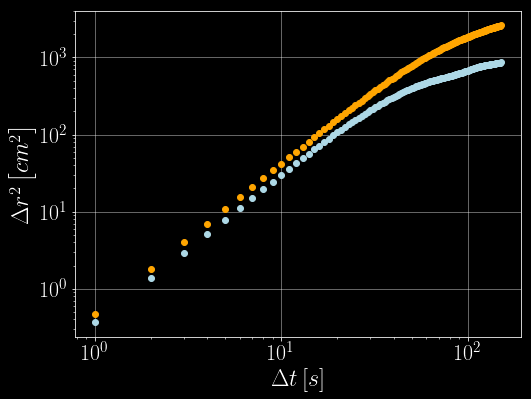

In [136]:
fig,ax = plt.subplots()

plt.loglog(imsd[0]/1E8,'o',color='LightBlue')
plt.loglog(imsd[1]/1E8,'o',color='Orange')

ax.grid(alpha=0.5)

ax.set_xlabel(r'$\Delta t \left[s\right]$')
ax.set_ylabel(r'$\Delta r^2  \left[cm^2\right]$')

fig.savefig('MSDloglog.png')

In [82]:
t = imsd.index.values

imsd1Overt = imsd[0]/1E8/t
imsd2Overt = imsd[1]/1E8/t

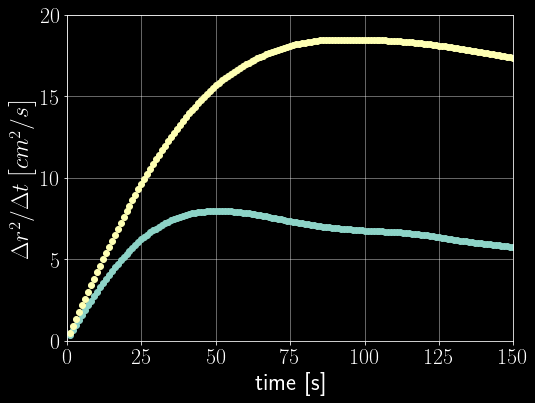

In [115]:
fig,ax = plt.subplots()

ax.plot(t,imsd1Overt,'o',t,imsd2Overt,'o');
ax.axis([0,150,0,20])
ax.grid(alpha=0.5)

ax.set_xlabel('time [s]')
ax.set_ylabel(r'$\Delta r^2 /\Delta t  \left[cm^2/s \right]$')
fig.savefig('MSDoverLag.png')

In [110]:
cond = t<20
fit1 = np.polyfit(t[cond],imsd1Overt[cond],deg=1)
fit2 = np.polyfit(t[cond],imsd2Overt[cond],deg=1)

v1 = fit1[0]**0.5
v2 = fit2[0]**0.5

asymp1 = 6
asymp2 = 17.5

In [112]:
tau1 = asymp1/v1**2
tau2 = asymp2/v2**2


In [113]:
print(v1)
print(v2)

print(tau1)
print(tau2)

0.5167881052842085
0.6292176880183136
22.466024706947024
44.20141815312735


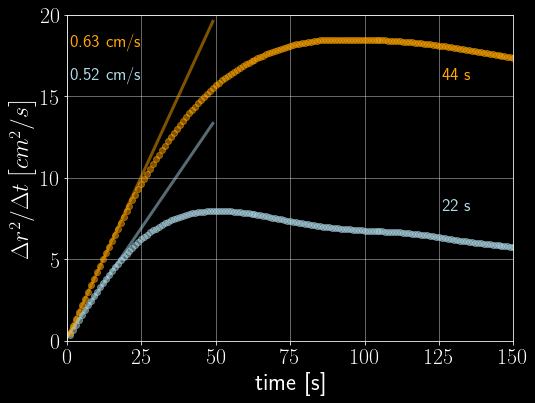

In [134]:
fig,ax = plt.subplots()

tFit = np.arange(50);
imsd1OvertFit = np.polyval(fit1,tFit)
imsd2OvertFit = np.polyval(fit2,tFit)

ax.plot(t,imsd1Overt,'o',color='LightBlue',alpha=0.5)
ax.plot(t,imsd2Overt,'o',color='Orange',alpha=0.5);
ax.plot(tFit,imsd1OvertFit,'LightBlue',tFit,imsd2OvertFit,'Orange',linewidth=3,alpha=0.5);
ax.axis([0,150,0,20])
ax.grid(alpha=0.5)
ax.text(1,18,r'0.63 cm/s',fontsize=18,color='Orange')
ax.text(1,16,r'0.52 cm/s',fontsize=18,color='LightBlue')

ax.text(126,16,r'44 s',fontsize=18,color='Orange')
ax.text(126,8,r'22 s',fontsize=18,color='LightBlue')

ax.set_xlabel('time [s]')
ax.set_ylabel(r'$\Delta r^2 /\Delta t  \left[cm^2/s \right]$')
fig.savefig('MSDoverLagWText.png')

In [90]:
v1 = (6/25)**0.5
v2 = (10./25)**0.5
print(v1)

0.4898979485566356


In [91]:
17./v2**2

42.5

In [94]:
5/v1**2

20.833333333333336